# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

### 1) Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

In [2]:
img = cv.imread('boat.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Otsu's threshold after Gaussian filtering
blur = cv.GaussianBlur(gray_img, (3, 3), 0)   # the third argument here is standard deviation
ret, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
mask = cv.bitwise_not(th)
final =cv.bitwise_and(img, img, mask = mask)

# Draw bouding box
x, y, w, h = cv.boundingRect(mask)
cv.rectangle(final, (x,y), (x+w, y+h), (0, 255, 0), 2)

cv.imshow('Bounding box', final)
cv.waitKey(0)
cv.destroyAllWindows()

### 2) Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [3]:
def trackbar(x):
    kernel = np.ones((x,x), np.uint8)
    erosion = cv.erode(img_binary, kernel, iterations = 1)
    dilation = cv.dilate(img_binary, kernel, iterations = 1)
    
    cv.imshow('window', np.hstack([erosion, dilation]))

img = cv.imread('leaf.jfif')
blur = cv.GaussianBlur(img, (5, 5), 0)
img_gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
_, img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# cv.imshow('window', img)
cv.namedWindow('window')
cv.imshow('window', img_gray)
max_kernel = 255
kernel = 3
cv.createTrackbar('erosion', 'window', kernel, max_kernel, trackbar)
trackbar(kernel)

cv.waitKey(0)
cv.destroyAllWindows()

### 3) Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [4]:
import matplotlib.pyplot as plt

In [5]:
resize_dim = (225, 225)

In [6]:
# Create function
def segment_porcelain(img):
    #Convert image into HSV
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # Set blue range
    blue_low = (70, 120, 0)
    blue_high = (120, 255, 120)
    
    #Apply blue mask
    mask = cv.inRange(hsv, blue_low, blue_high)
    
    #AND operation
    res = cv.bitwise_and(img, img, mask = mask)
    
    #Clean up the segmentation using blur filter
    blur = cv.GaussianBlur(res, (5, 5), 0)
    return blur

filename = "porcelain"

porcelain_list = []
for i in range(1, 6):
    img_porcelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), resize_dim)
    porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB)
    porcelain_list.append(porcelain)
    
results = [segment_porcelain(porcelain) for porcelain in porcelain_list]

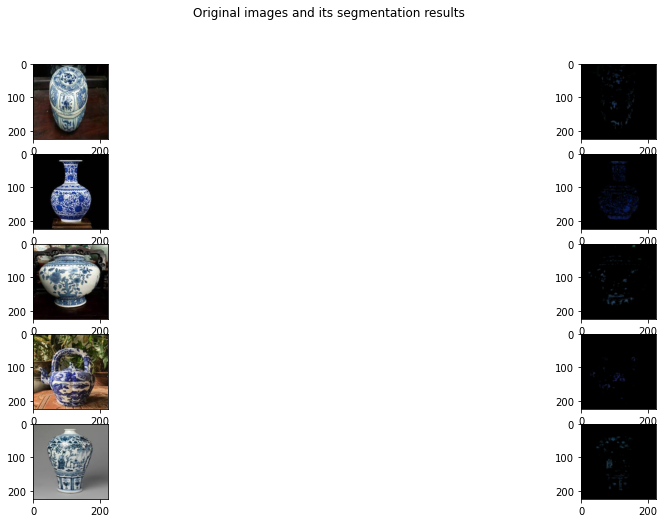

In [31]:
f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(results[i])
    
f.suptitle('Original images and its segmentation results')
plt.show()